# 数据挖掘互评作业2

一、加载数据、处理

In [85]:
from pandas import Series,DataFrame,np
from numpy import nan as NA
import pandas as pd
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt


#1.加载数据
def load_data(path,filename):
    return pd.read_csv(path + '/' + filename)
root = 'E:\oakland-crime-statistics-2011-to-2016'
data = load_data(root,'records-for-2011.csv')#中文
data2 = load_data(root,'records-for-2011.csv')#中文

#2.缺失数据统计 -列
data.isnull().sum()
print("每列缺失的数据个数分别为:")
print(data.isnull().sum())


#3.缺失值填补-根据不同属性特点，分为三种方法
#3.1根据属性之间的相关关系填补缺失值
print("Area Id和Beat根据Location值进行填补")
# 查看Area Id,Beat特征缺失处对应的包含Area Id,Beat
#所需要的信息的Location特征的具体情况
area_locationdes=data.loc[data['Area Id'].isnull(), 'Location']
beat_locationdes=data.loc[data['Beat'].isnull(), 'Location']
# 定位到Area Id,Beat征缺失信息的具体位置
area_loc=data.loc[data['Area Id'].isnull(), 'Area Id']
beat_loc=data.loc[data['Beat'].isnull(), 'Beat']
# 结合前面两步，利用字符串提取来补充Area Id的缺失信息
data.loc[data['Area Id'].isnull(), 'Area Id'] 
    = [str(x)[0: len(str(x))] for x in area_locationdes]
data.loc[data['Beat'].isnull(), 'Beat']
    = [str(y)[0: len(str(y))] for y in beat_locationdes]
#print("填补后Area Id缺失个数为:",data['Area Id'].isnull().sum())
#print("填补后Beat缺失个数为:",data['Beat'].isnull().sum())

#3.2删除-Agency,Create Time,Event Number,Event Number属性唯一的空值所在行
print("Agency,Create Time,Priority,ITI,ITD,Event Number删除缺失值")
data=data.dropna(axis=0,subset=['Agency'])

#3.3删除和关联规则挖掘关系不大的属性（值仅有一个或者一个属性只有一种值的情况）
data=data.drop(['Agency','Create Time','Event Number','Closed Time'],axis=1)

#检验缺失值处理后是否还存在缺失值
print("填补后数据的缺失个数分别为:",data.isnull().sum())

print("处理后的数据shape为:",data.shape)
print("处理后的数据为:",data)


e:\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


每列缺失的数据个数分别为:
Agency                         1
Create Time                    1
Location                       0
Area Id                      904
Beat                         520
Priority                       1
Incident Type Id               1
Incident Type Description      1
Event Number                   1
Closed Time                    7
dtype: int64
Area Id和Beat根据Location值进行填补
Agency,Create Time,Priority,ITI,ITD,Event Number删除缺失值
填补后数据的缺失个数分别为: Location                     0
Area Id                      0
Beat                         0
Priority                     0
Incident Type Id             0
Incident Type Description    0
dtype: int64
处理后的数据shape为: (180015, 6)
处理后的数据为:                         Location Area Id Beat  Priority Incident Type Id  \
0                ST&SAN PABLO AV       1  06X       1.0             PDOA   
1                  ST&HANNAH ST        1  07X       1.0            415GS   
2                  ST&MARKET ST        1  10Y       2.0            415GS   
3       

In [67]:
relim_input = itemmining.get_relim_input(data)
relim_input

([((0, (5, 't')), []),
  ((0, (4, 'i')), []),
  ((0, (4, 'e')), []),
  ((0, (3, 'y')), []),
  ((0, (3, 'r')), []),
  ((0, (3, 'o')), []),
  ((0, (3, 'n')), []),
  ((0, (3, 'd')), []),
  ((0, (3, 'c')), []),
  ((0, (3, 'a')), []),
  ((0, (3, 'I')), []),
  ((0, (3, ' ')), []),
  ((0, (2, 'p')), []),
  ((1, (2, 'T')),
   [(1,
     ((2, 'p'),
      (3, ' '),
      (3, 'I'),
      (3, 'c'),
      (3, 'd'),
      (3, 'n'),
      (3, 'y'),
      (4, 'e'),
      (4, 'i'),
      (5, 't')))]),
  ((0, (1, 's')), []),
  ((1, (1, 'P')), [(1, ((3, 'o'), (3, 'r'), (3, 'y'), (4, 'i'), (5, 't')))]),
  ((1, (1, 'L')),
   [(1, ((3, 'a'), (3, 'c'), (3, 'n'), (3, 'o'), (4, 'i'), (5, 't')))]),
  ((1, (1, 'D')),
   [(1,
     ((1, 's'),
      (2, 'T'),
      (2, 'p'),
      (3, ' '),
      (3, 'I'),
      (3, 'c'),
      (3, 'd'),
      (3, 'n'),
      (3, 'o'),
      (3, 'r'),
      (3, 'y'),
      (4, 'e'),
      (4, 'i'),
      (5, 't')))]),
  ((1, (1, 'B')), [(1, ((3, 'a'), (4, 'e'), (5, 't')))]),
  ((1, 

二、关联规则挖掘

In [ ]:
report = itemmining.relim(relim_input, min_support=2)
#report

In [ ]:
rules1 = assocrules.mine_assoc_rules(report, min_support=2, min_confidence=0.5)
#rules1
# for line in rules1:
#     if len(line[0])>1 or len(line[1])>1 :
#         print(line) 
        

In [71]:
print(type(line))

<class 'tuple'>


In [72]:
print(line[3])

0.8


In [75]:
confidence=[]
for line in rules1:
    if len(line[0])>1 or len(line[1])>1 :
        confidence.append(line[3])

df_con=pd.DataFrame(confidence,columns=['confidence'])
print(df_con.shape)

(172311, 1)


In [107]:

df_cs=pd.concat([df_supp,df_con],axis=1)
df_cs.describe()
#5.汇总和描述等统计量的计算
print("汇总和描述等统计量的计算")
#对数据的基本统计量进行描述,得到每列数据的行数、平均值、协方差、最小值
#、四分之一分位数、中位数、四分之三分位数、最大值
print("对支持度和置信度的基本统计量进行描述")
print(df_cs.describe())
df_cs

汇总和描述等统计量的计算
对支持度和置信度的基本统计量进行描述
             support     confidence
count  172311.000000  172311.000000
mean        0.577064       0.961774
std         0.067123       0.111871
min         0.300000       0.500000
25%         0.600000       1.000000
50%         0.600000       1.000000
75%         0.600000       1.000000
max         0.600000       1.000000


,support,confidence
0,0.6,1.000000
1,0.6,1.000000
2,0.6,1.000000
3,0.6,1.000000
4,0.6,1.000000
...,...,...
172306,0.3,0.500000
172307,0.3,0.500000
172308,0.6,1.000000
172309,0.3,0.500000


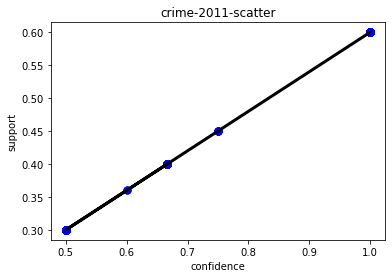

In [110]:
# 绘制趋势图
def result_plot(title_str):
    x=df_cs["confidence"]
    y=df_cs["support"]
    parameter = np.polyfit(x, y, 1)
    f = np.poly1d(parameter)  # 拼接方程
    plt.plot(x, f(x), "black", linewidth=3)
    #plt.scatter(real, pred, marker='o', alpha=0.7, s=15)
    # s设置点的大小
    # c是颜色
    # alpha是透明度
    plt.scatter(x, y, s=50, c='b', alpha=0.5)
    plt.xlabel('confidence')
    plt.ylabel('support')
    plt.title(title_str)
   
    plt.show()
    

result_plot("crime-2011-scatter")

In [ ]:
#盒图
def drawbox():

    fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    df_cs=df_cs[0:50]
    axes[0].violinplot(df_cs, showmeans=False, showmedians=True)
    axes[0].set_title('Crime_violin plot')

    v = axes[0].violinplot(df_cs, showmeans=False, showmedians=True,color=['red','blue'])
    print(v)


    color_boxes = ['mistyrose', 'aliceblue']  # 散点颜色

    ###############################################################

    f = axes[1].boxplot(df_cs,patch_artist=True,positions=(0.01,1))
    #plt.setp(f, xticks=[y + 1 for y in range(len(tang_data))], xticklabels=['l2r', 'l-r'])
    #axes[1].set_xticks([0.03,1],['confidence','support'])
    # 这里共有四个box
    color_edge=['lightcoral','dodgerblue']
    for box, cb,ce in zip(f['boxes'], color_boxes,color_edge):
        # 箱体边框颜色
        box.set(color=ce, linewidth=2)
        # 箱体内部填充颜色
        box.set(facecolor=cb)

    color_w=['rosybrown','rosybrown','steelblue','steelblue']
    # 这里设置的是各个box的其他属性
    for whisker,cw in zip(f['whiskers'],color_w):
        whisker.set(color=cw, linewidth=2,alpha=0.8)
    color_c = ['rosybrown','rosybrown','steelblue','steelblue']
    for cap,cc in zip(f['caps'],color_c):
        cap.set(color=cc, linewidth=3,alpha=0.8)
    #中位线
    color_median=['darkred','DarkBlue']
    f or median,cm in zip(f['medians'],color_median):
        median.set(color=cm, linewidth=3)

    for flier in f['fliers']:
        flier.set(marker='x', color='y', alpha=0.5)
    #####################################################

    axes.set_title('Crime_box plot')

    # for ax in axes:
    # 对y轴加上网格
    axes.yaxis.grid(True)
    axes.set_xticks([y + 1 for y in range(len(df_cs))])
    # 对每个图加上xticks操作
    plt.ylabel('r-val')
    plt.setp(axes, xticks=[y for y in range(len(df_cs))], xticklabels=['confidence', 'support'])
    plt.plot()
    plt.show()


drawbox()